In [1]:
import pandas as pd
import json
import seaborn as sns
import matplotlib as plt
import requests
from scipy import misc
from IPython.display import display, Image
import random
import numpy as np
import cv2
import os
os.chdir('/home/app/src/') 

## Load Json

In [2]:


#Loadign dataset
with open('/home/app/src/data/products.json', encoding='utf-8') as f:
    prod = json.load(f)
    
df = pd.DataFrame(prod)
df = df.drop(['price', 'upc', 'shipping', 'model'], axis=1)



In [3]:
#Adding a column named ending to see if image is a png or a gift

ending= []

for row in df['image']:
    ending.append(row.split('.')[-1])

df['ending'] = ending

# Adding the end to the column
ends = []
for row in df['image']:

    for row in df['ending']:
    
        if row == 'gif':
            continue    
    ends.append(row)

In [4]:
#Checking if and image doensnt have url
df.url.isna().sum() 

0

In [5]:
#Numbers of gifs and png

df['ending'].value_counts()

jpg    51625
gif       21
Name: ending, dtype: int64

## Check the gifs

Row 15


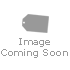

Row 1398


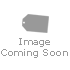

Row 4219


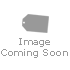

Row 4360


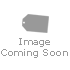

Row 9619


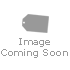

Row 10484


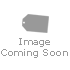

Row 11114


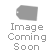

Row 11115


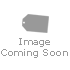

Row 13816


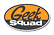

Row 35922


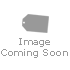

Row 35923


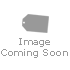

Row 35924


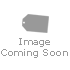

Row 35926


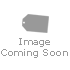

Row 35927


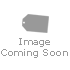

Row 35928


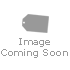

Row 35929


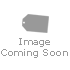

Row 35930


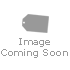

Row 40339


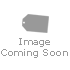

Row 40358


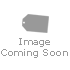

Row 47716


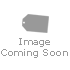

Row 50497


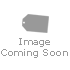

In [20]:

#iter through the df
for index ,row in df.iterrows():
    
    #download only the gifs
    if 'gif' in df['ending'][index] :
        end = df['image'][index].split('.')[-1]
        img_name = "row" + str(index) +'.gif'
        img = requests.get(df['image'][index]).content
        with open("/home/app/src/data/img_gifs/" + img_name, 'wb') as handler:
            handler.write(img)
    
    if 'gif' in df['ending'][index] :
        print('Row', index)
        display(Image(filename='/home/app/src/data/img_gifs/row'+str(index)+'.gif'))
        


## Broken URLS

In [5]:
index=0
counter= 0
broken_ones= []

for row in df['image']:
    index += 1
    
           
    image = requests.get(row).content

    #if len is 9 is a broken url
    if len(image) == 9 :
        
        end = row.split('.')[-1]
        nombre_local_imagen = "row" + str(index) +'.'+ str(end)
   
        with open("/home/app/src/data/img_broken/" + nombre_local_imagen, 'wb') as handler:
            handler.write(image)
            counter +=1
            broken_ones.append(index)
            print(counter)
            

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [6]:
print('Total images with broken links', counter)

Total images with broken links 1595


In [7]:
broken_ones

[38,
 94,
 224,
 228,
 469,
 470,
 612,
 613,
 798,
 949,
 971,
 982,
 996,
 1022,
 1075,
 1139,
 1253,
 1254,
 1256,
 1429,
 1488,
 1540,
 1559,
 1589,
 1672,
 1678,
 1729,
 1731,
 1733,
 1819,
 1844,
 1900,
 1980,
 1982,
 1983,
 1987,
 2089,
 2091,
 2202,
 2269,
 2525,
 2530,
 2602,
 2610,
 2744,
 2757,
 2759,
 2784,
 2789,
 3121,
 3389,
 3414,
 3415,
 3459,
 3471,
 3472,
 3473,
 3475,
 3476,
 3477,
 3524,
 3676,
 3881,
 3947,
 3957,
 4036,
 4051,
 4057,
 4063,
 4102,
 4194,
 4302,
 4364,
 4411,
 4414,
 4415,
 4469,
 4532,
 4534,
 4535,
 4561,
 4562,
 4567,
 4601,
 4734,
 4802,
 4806,
 4878,
 4884,
 4888,
 4889,
 4943,
 4947,
 4950,
 4969,
 4970,
 4989,
 5096,
 5133,
 5251,
 5284,
 5380,
 5383,
 5386,
 5469,
 5493,
 5494,
 5628,
 5629,
 5671,
 5673,
 5677,
 5714,
 5718,
 5728,
 5730,
 5734,
 5738,
 5739,
 5763,
 5809,
 6020,
 6065,
 6066,
 6072,
 6145,
 6190,
 6219,
 6221,
 6222,
 6224,
 6231,
 6233,
 6259,
 6348,
 6359,
 6362,
 6384,
 6385,
 6386,
 6387,
 6399,
 6419,
 6449,
 6457,


In [8]:
percentage = counter/df.shape[0]*100
print(f'Total images with broken links: {round(percentage,2)}%')

Total images with broken links: 3.09%


In [21]:
#deleting gift and broken urls
ind = 0  
for row in df['image']:        
    image = requests.get(row).content
    if len(image) == 9 or df['ending'][ind] == 'gif':
        df2 = df.drop(index =ind, axis=0 ,inplace=True)
        print('delete',ind)
    ind +=1
    
    

delete 15
delete 37
delete 93
delete 223
delete 227
delete 468
delete 469
delete 611
delete 612
delete 797
delete 948
delete 970
delete 981
delete 995
delete 1021
delete 1074
delete 1138
delete 1252
delete 1253
delete 1255
delete 1398
delete 1428
delete 1487
delete 1539
delete 1558
delete 1588
delete 1671
delete 1677
delete 1728
delete 1730
delete 1732
delete 1818
delete 1843
delete 1899
delete 1979
delete 1981
delete 1982
delete 1986
delete 2088
delete 2090
delete 2201
delete 2268
delete 2524
delete 2529
delete 2601
delete 2609
delete 2743
delete 2756
delete 2758
delete 2783
delete 2788
delete 3120
delete 3388
delete 3413
delete 3414
delete 3458
delete 3470
delete 3471
delete 3472
delete 3474
delete 3475
delete 3476
delete 3523
delete 3675
delete 3880
delete 3946
delete 3956
delete 4035
delete 4050
delete 4056
delete 4062
delete 4101
delete 4193
delete 4219
delete 4301
delete 4360
delete 4363
delete 4410
delete 4413
delete 4414
delete 4468
delete 4531
delete 4533
delete 4534
delete 45

In [38]:
df = df.set_index(pd.Series(range(len(df))))
df.head(17)

,sku,name,type,category,description,manufacturer,url,image,ending
0,43900,Duracell - AAA Batteries (4-Pack),HardGood,"[{'id': 'pcmcat312300050015', 'name': 'Connect...",Compatible with select electronic devices; AAA...,Duracell,http://www.bestbuy.com/site/duracell-aaa-batte...,http://img.bbystatic.com/BestBuy_US/images/pro...,jpg
1,48530,Duracell - AA 1.5V CopperTop Batteries (4-Pack),HardGood,"[{'id': 'pcmcat312300050015', 'name': 'Connect...",Long-lasting energy; DURALOCK Power Preserve t...,Duracell,http://www.bestbuy.com/site/duracell-aa-1-5v-c...,http://img.bbystatic.com/BestBuy_US/images/pro...,jpg
2,127687,Duracell - AA Batteries (8-Pack),HardGood,"[{'id': 'pcmcat312300050015', 'name': 'Connect...",Compatible with select electronic devices; AA ...,Duracell,http://www.bestbuy.com/site/duracell-aa-batter...,http://img.bbystatic.com/BestBuy_US/images/pro...,jpg
3,150115,Energizer - MAX Batteries AA (4-Pack),HardGood,"[{'id': 'pcmcat312300050015', 'name': 'Connect...",4-pack AA alkaline batteries; battery tester i...,Energizer,http://www.bestbuy.com/site/energizer-max-batt...,http://img.bbystatic.com/BestBuy_US/images/pro...,jpg
4,185230,Duracell - C Batteries (4-Pack),HardGood,"[{'id': 'pcmcat312300050015', 'name': 'Connect...",Compatible with select electronic devices; C s...,Duracell,http://www.bestbuy.com/site/duracell-c-batteri...,http://img.bbystatic.com/BestBuy_US/images/pro...,jpg
5,185267,Duracell - D Batteries (4-Pack),HardGood,"[{'id': 'pcmcat312300050015', 'name': 'Connect...",Compatible with select electronic devices; D s...,Duracell,http://www.bestbuy.com/site/duracell-d-batteri...,http://img.bbystatic.com/BestBuy_US/images/pro...,jpg
6,312290,Duracell - 9V Batteries (2-Pack),HardGood,"[{'id': 'pcmcat312300050015', 'name': 'Connect...",Compatible with select electronic devices; alk...,Duracell,http://www.bestbuy.com/site/duracell-9v-batter...,http://img.bbystatic.com/BestBuy_US/images/pro...,jpg
7,324884,Directed Electronics - Viper Audio Glass Break...,HardGood,"[{'id': 'pcmcat113100050015', 'name': 'Carfi I...",From our expanded online assortment; compatibl...,Directed Electronics,http://www.bestbuy.com/site/directed-electroni...,http://img.bbystatic.com/BestBuy_US/images/pro...,jpg
8,333179,Energizer - N Cell E90 Batteries (2-Pack),HardGood,"[{'id': 'pcmcat312300050015', 'name': 'Connect...",Alkaline batteries; 1.5V,Energizer,http://www.bestbuy.com/site/energizer-n-cell-e...,http://img.bbystatic.com/BestBuy_US/images/pro...,jpg
9,346575,Metra - Radio Installation Dash Kit for Most 1...,HardGood,"[{'id': 'abcat0300000', 'name': 'Car Electroni...",From our expanded online assortment; compatibl...,Metra,http://www.bestbuy.com/site/metra-radio-instal...,http://img.bbystatic.com/BestBuy_US/images/pro...,jpg
